In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
cid_train= pd.read_csv('adult.data.csv')

# reading test data from csv file
cid_test= pd.read_csv('adult.test.csv')

# sample of train data
print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
cid_train.head(3)

Train data sample


,Age,Workclass,Fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
# sample of test data
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
cid_test.head(3)

Test data sample


,Age,Workclass,Fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


###### Performing EDA

In [4]:
# checking shape of train and test data
print('\x1b[1;31m'+'Train data shape'+'\x1b[0m',cid_train.shape)
print('\x1b[1;31m'+'Test data shape'+'\x1b[0m',cid_test.shape)

Train data shape (32561, 15)
Test data shape (16281, 15)


In [5]:
# checking data type of train and test data
print('\x1b[1;31m'+'Data type of train data set\n\n'+'\x1b[0m',cid_train.dtypes,'\n\n')
print('\x1b[1;31m'+'Data type of test data set\n'+'\x1b[0m',cid_test.dtypes)

Data type of train data set

 Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object 


Data type of test data set
 Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object


In [6]:
#checking unique values in train and test data
print('\x1b[1;31m'+'Unique value in train data set\n\n'+'\x1b[0m',cid_train.nunique(),'\n\n')
print('\x1b[1;31m'+'Unique value in test data set\n'+'\x1b[0m',cid_test.nunique())

Unique value in train data set

 Age                  73
Workclass             9
Fnlwgt            21648
Education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64 


Unique value in test data set
 Age                  73
Workclass             9
Fnlwgt            12787
Education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        113
capital-loss         82
hours-per-week       89
native-country       41
Income                2
dtype: int64


In [7]:
# replacing all '?' values with nan values in train and test data
cid_train = cid_train.replace('?', np.nan)
cid_test = cid_test.replace('?', np.nan)

In [8]:
# droping Education column since Education and education-num represent same thing
cid_train=cid_train.drop(['Education'], axis=1)
cid_test=cid_test.drop(['Education'], axis=1)

In [9]:
# checking null value in train and test data
print('\x1b[1;31m'+'Null value in train data set\n\n'+'\x1b[0m',cid_train.isnull().sum(),'\n\n')
print('\x1b[1;31m'+'Null value in test data set\n'+'\x1b[0m',cid_test.isnull().sum())

Null value in train data set

 Age                  0
Workclass         1836
Fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64 


Null value in test data set
 Age                 0
Workclass         963
Fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
Income              0
dtype: int64


Heat map of null value in train data set




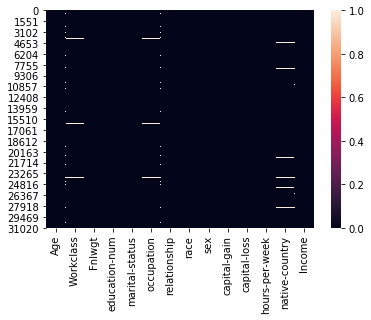

In [10]:
# heatmap of null value in train and test data
print('\x1b[1;31m'+'Heat map of null value in train data set\n\n'+'\x1b[0m')
sns.heatmap(cid_train.isnull())

Heat map of null value in test data set



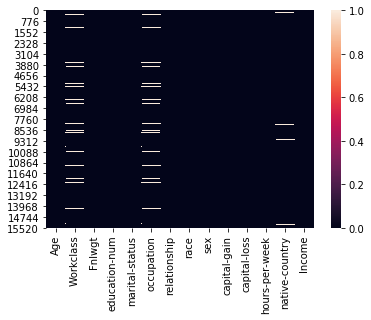

In [11]:
print('\x1b[1;31m'+'Heat map of null value in test data set\n'+'\x1b[0m')
sns.heatmap(cid_test.isnull())

In [12]:
# checking shape of train and test data after removing null values
cid_train.dropna(inplace=True)
print('\x1b[1;31m'+'Train data shape'+'\x1b[0m',cid_train.shape)
cid_test.dropna(inplace=True)
print('\x1b[1;31m'+'Test data shape'+'\x1b[0m',cid_test.shape)

Train data shape (30162, 14)
Test data shape (15060, 14)


In [13]:
# checking the data description
print('\x1b[1;31m'+'Description of train data set\n\n'+'\x1b[0m')
cid_train.describe()

Description of train data set




,Age,Fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
print('\x1b[1;31m'+'Description of test data set\n'+'\x1b[0m')
cid_test.describe()

Description of test data set



,Age,Fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [15]:
# corelation between coloums
print('\x1b[1;31m'+'Corelation in train data set\n'+'\x1b[0m')
cid_train.corr()

Corelation in train data set



,Age,Fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
Fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


In [16]:
print('\x1b[1;31m'+'Corelation in test data set\n'+'\x1b[0m')
cid_test.corr()

Corelation in test data set



,Age,Fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.074375,0.026123,0.078760,0.057745,0.102758
Fnlwgt,-0.074375,1.000000,-0.036010,-0.012839,0.006421,-0.010306
education-num,0.026123,-0.036010,1.000000,0.131750,0.085817,0.133691
capital-gain,0.078760,-0.012839,0.131750,1.000000,-0.031876,0.090501
capital-loss,0.057745,0.006421,0.085817,-0.031876,1.000000,0.057712
hours-per-week,0.102758,-0.010306,0.133691,0.090501,0.057712,1.000000


Heat map of corelation in train data set



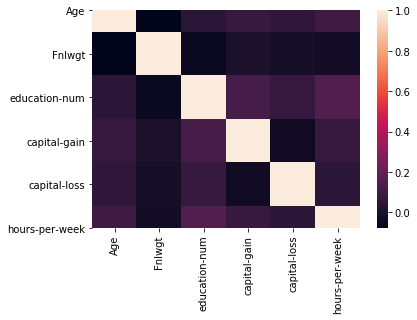

In [17]:
# heat map of corelation
print('\x1b[1;31m'+'Heat map of corelation in train data set\n'+'\x1b[0m')
sns.heatmap(cid_train.corr())

Corelation in test data set



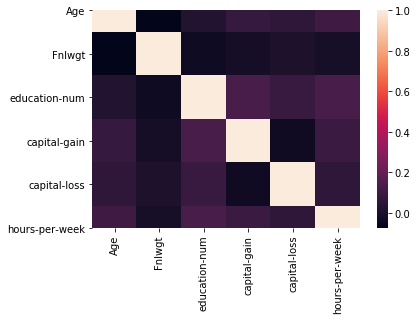

In [18]:
print('\x1b[1;31m'+'Corelation in test data set\n'+'\x1b[0m')
sns.heatmap(cid_test.corr())

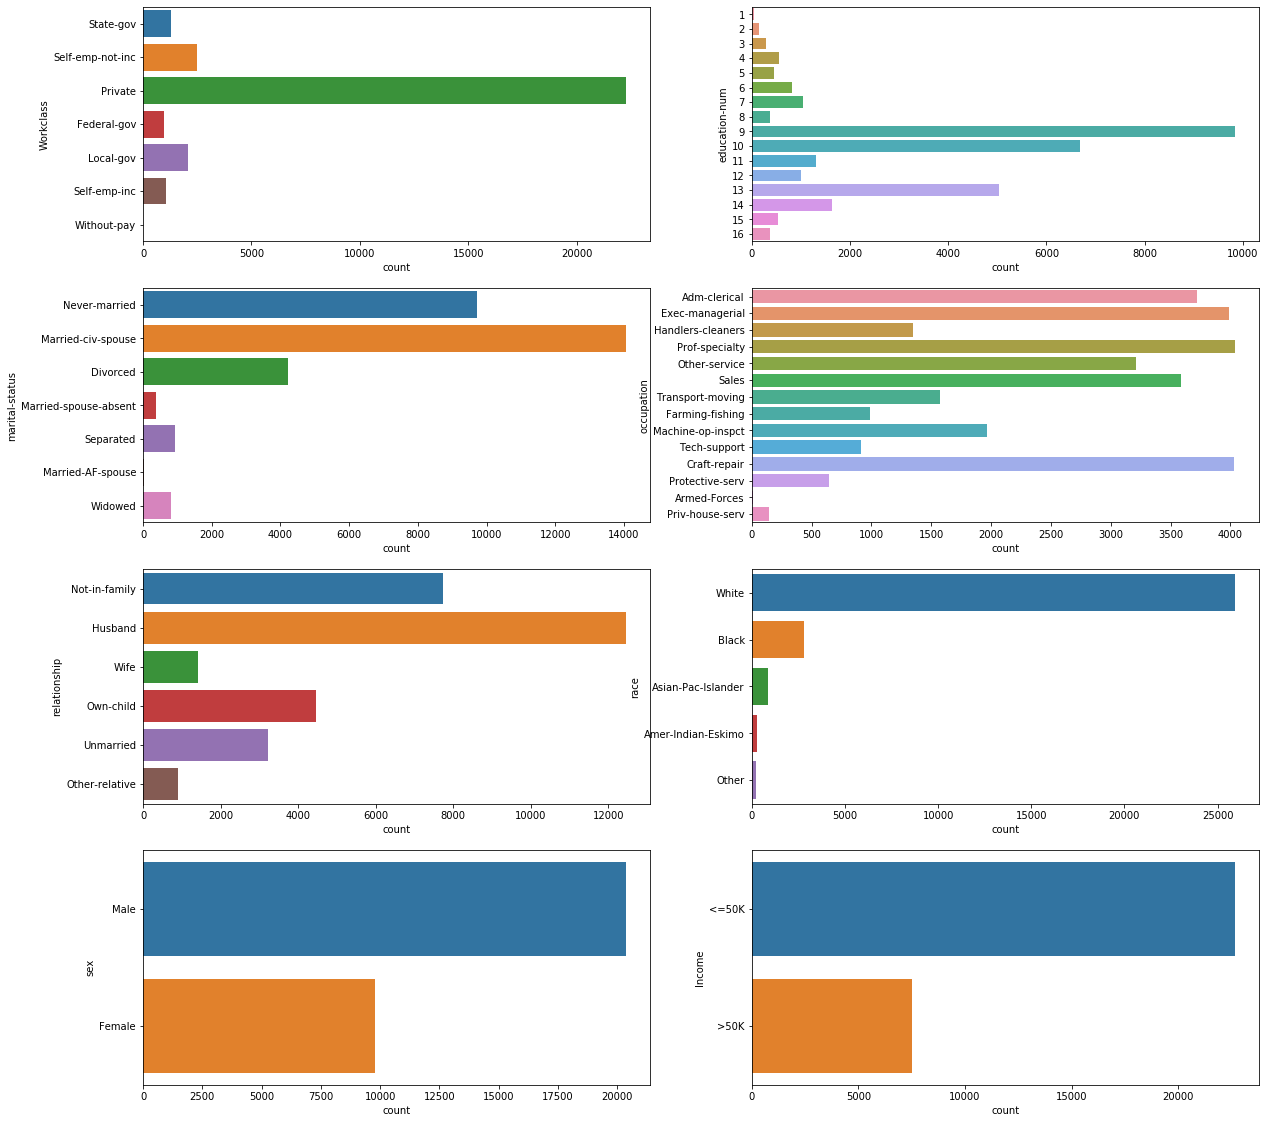

In [19]:
#creating barplot of colums to check the count of indivisual value
count=cid_train[['Workclass','education-num','marital-status','occupation','relationship','race','sex','Income']]
figure(num=None,figsize=(20,25))
for column_index,col in enumerate(count.columns):
    plt.subplot(5,2,column_index+1)
    sns.countplot(y=count[col],data=count)

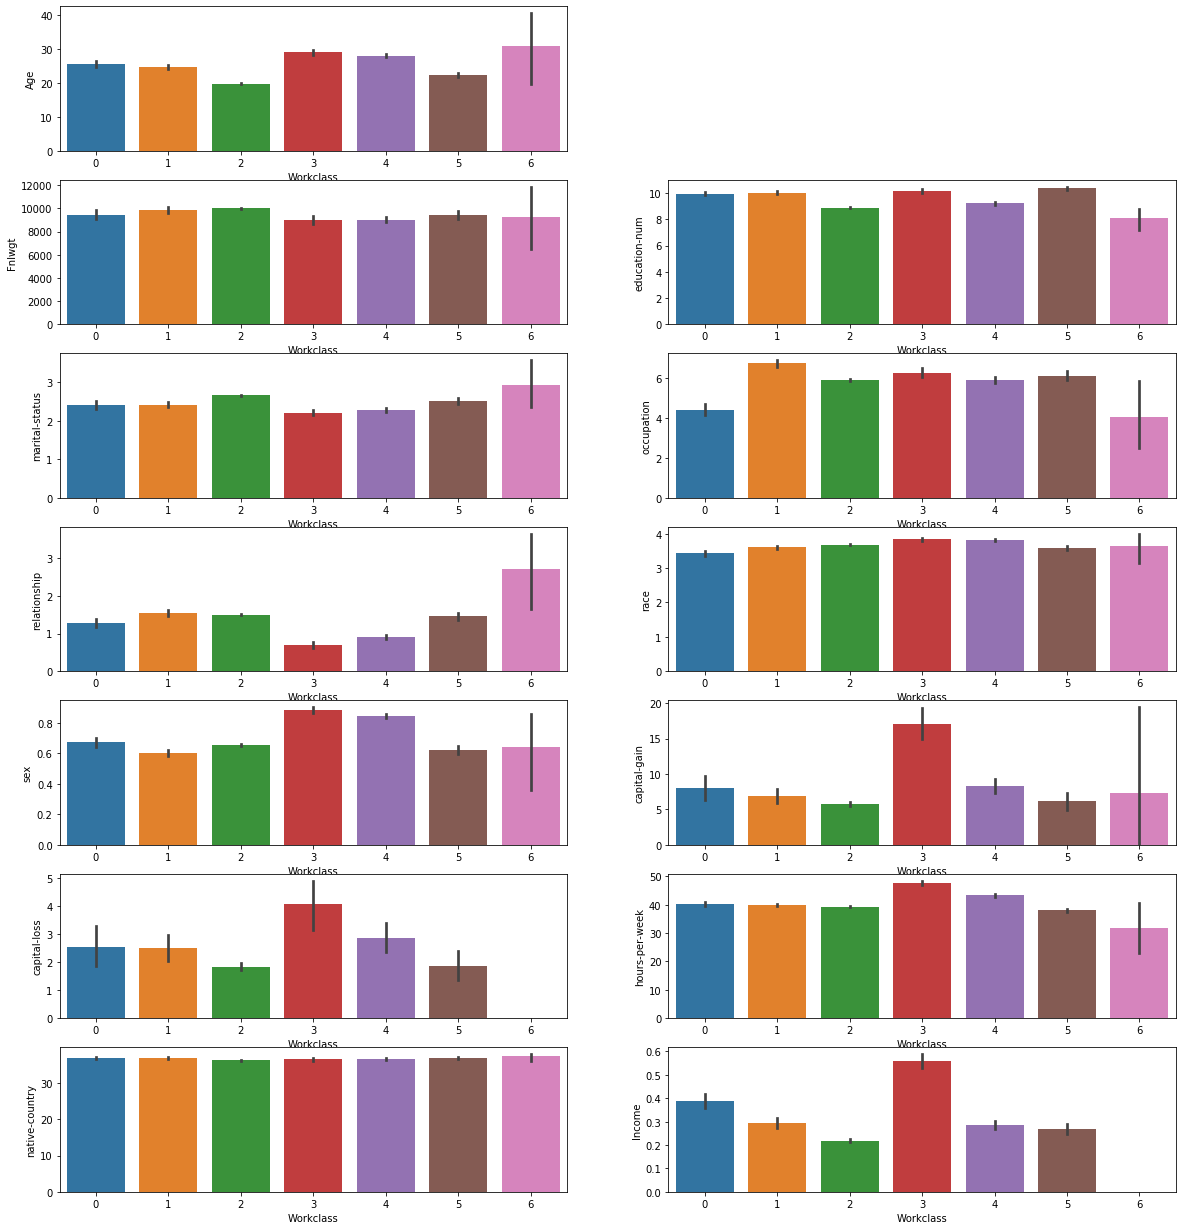

In [20]:
# creating bar plot of colums with respect to Workclass to check distribution among Workclass
cid_train1=cid_train
cid_train1=cid_train1.apply(LabelEncoder().fit_transform).astype(int)
figure(num=None, figsize=(20,25))
for column_index, column in enumerate(cid_train1.columns):
    if column == 'Workclass':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='Workclass', y=column, data=cid_train1)

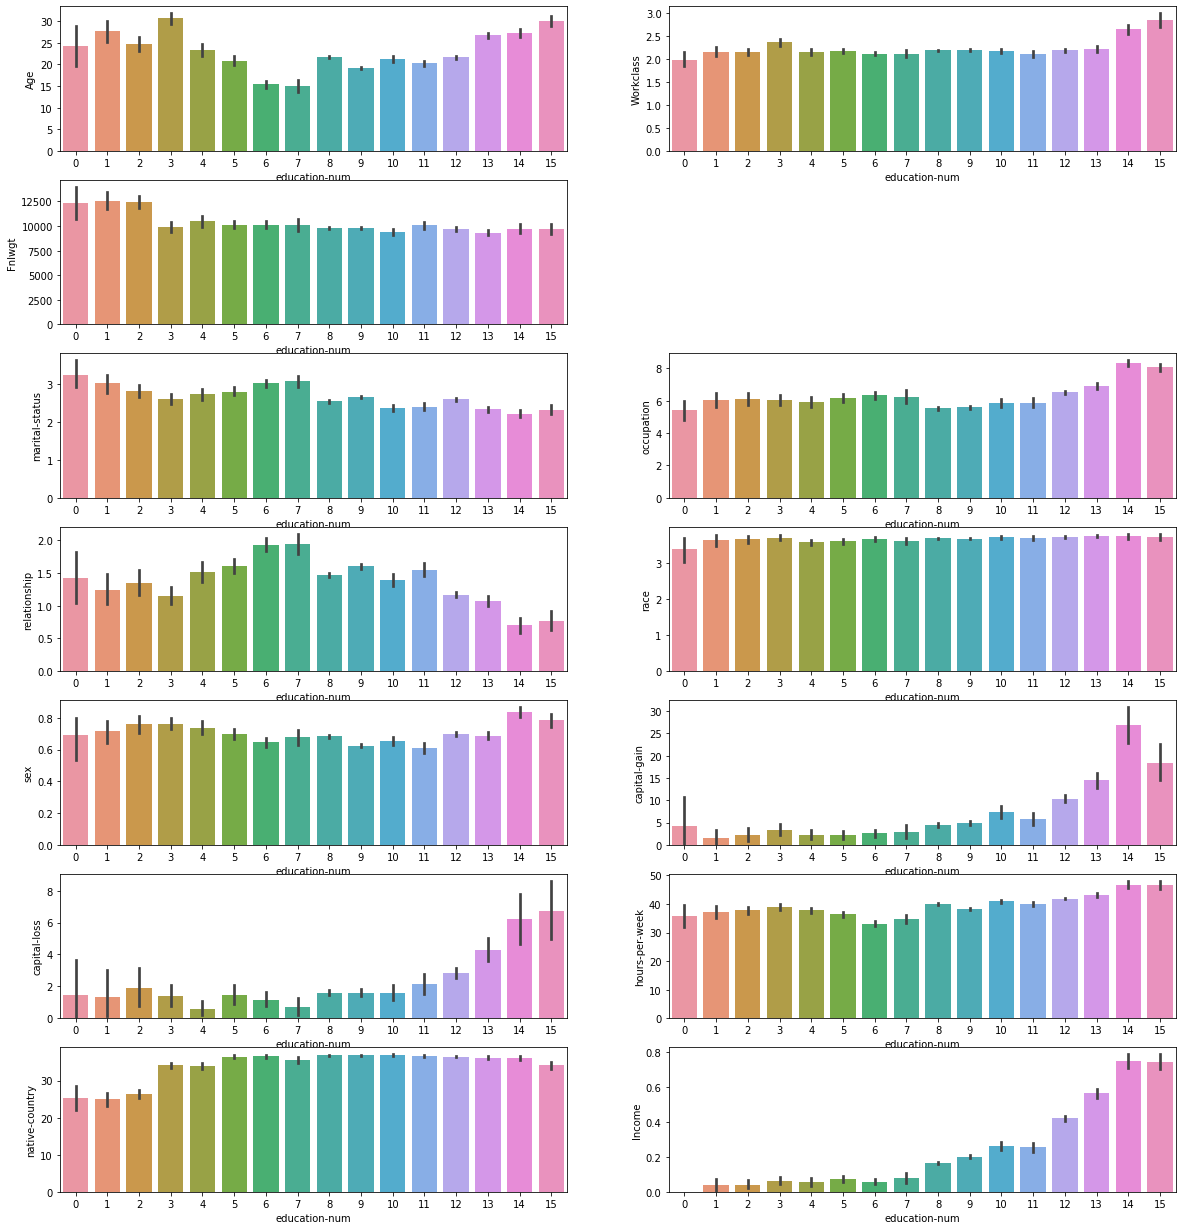

In [21]:
# creating bar plot of colums with education-num to cp to check distribution among education-num
figure(num=None, figsize=(20,25))
for column_index, column in enumerate(cid_train1.columns):
    if column == 'education-num':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='education-num', y=column, data=cid_train1)

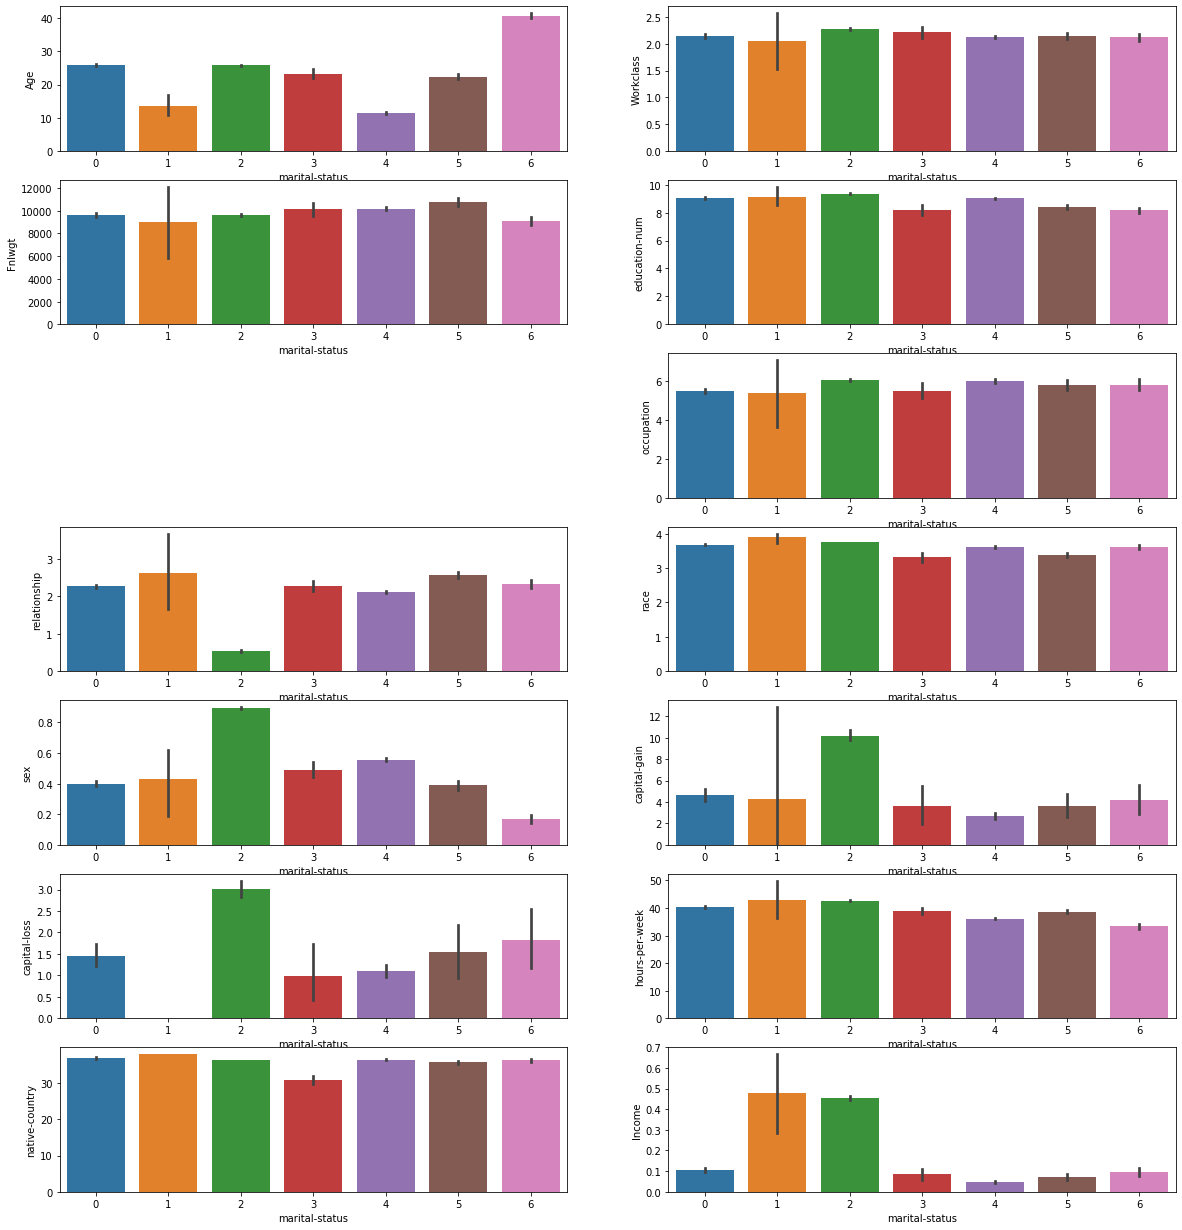

In [22]:
# creating bar plot of colums with respect to marital-status to check distribution among marital-status
figure(num=None, figsize=(20,25))
for column_index, column in enumerate(cid_train1.columns):
    if column == 'marital-status':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='marital-status', y=column, data=cid_train1)

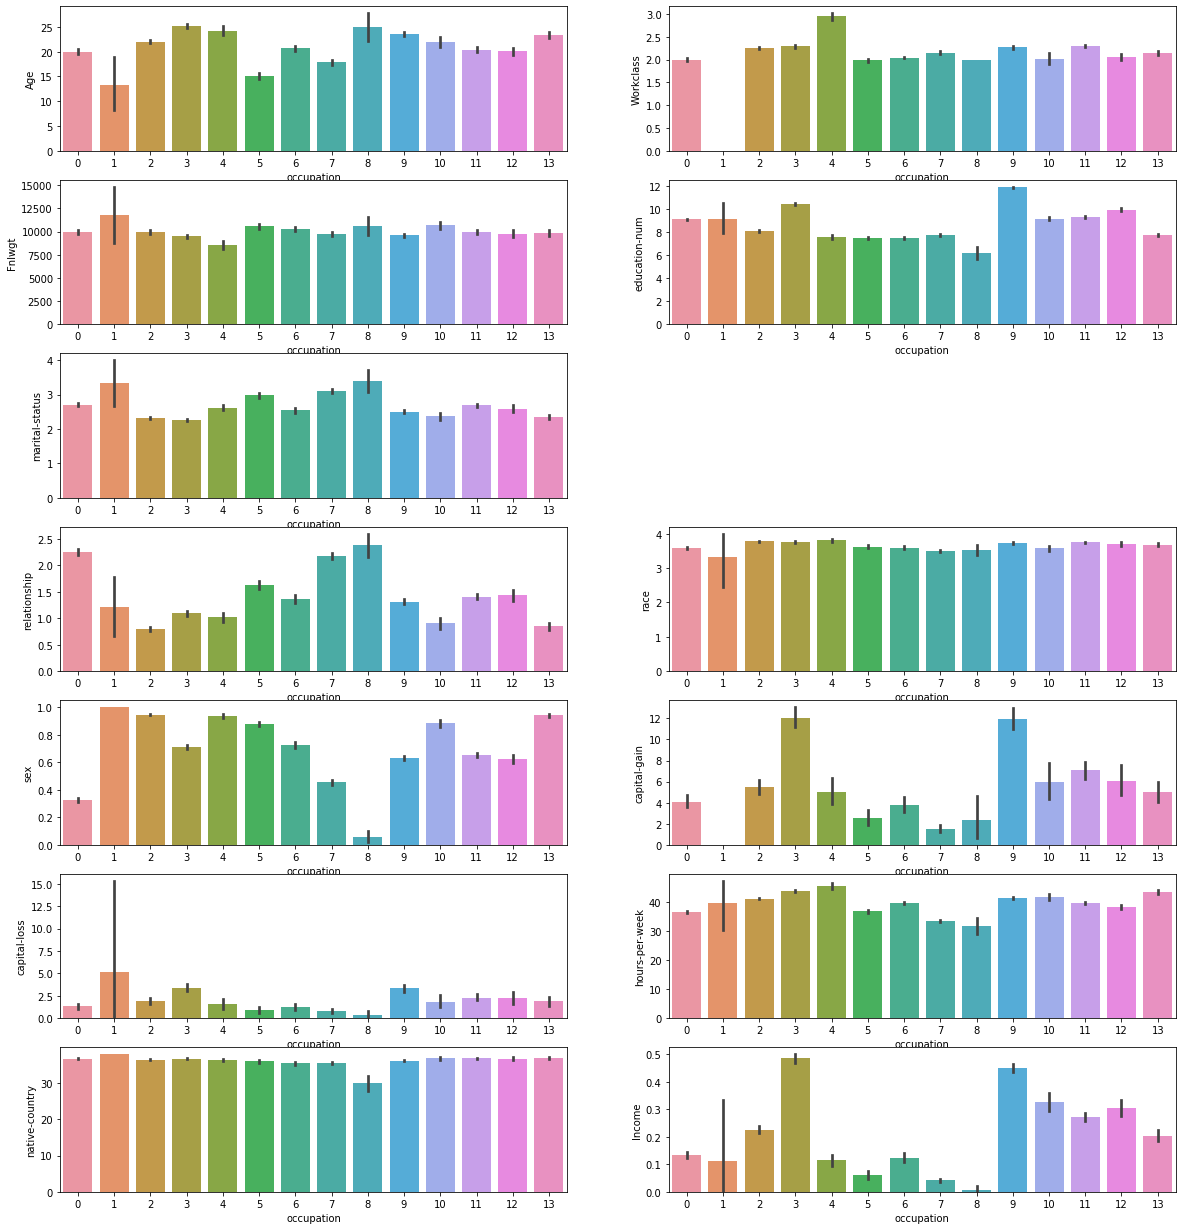

In [23]:
# creating bar plot of colums with respect to occupation to check distribution among occupation
figure(num=None, figsize=(20,25))
for column_index, column in enumerate(cid_train1.columns):
    if column == 'occupation':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='occupation', y=column, data=cid_train1)

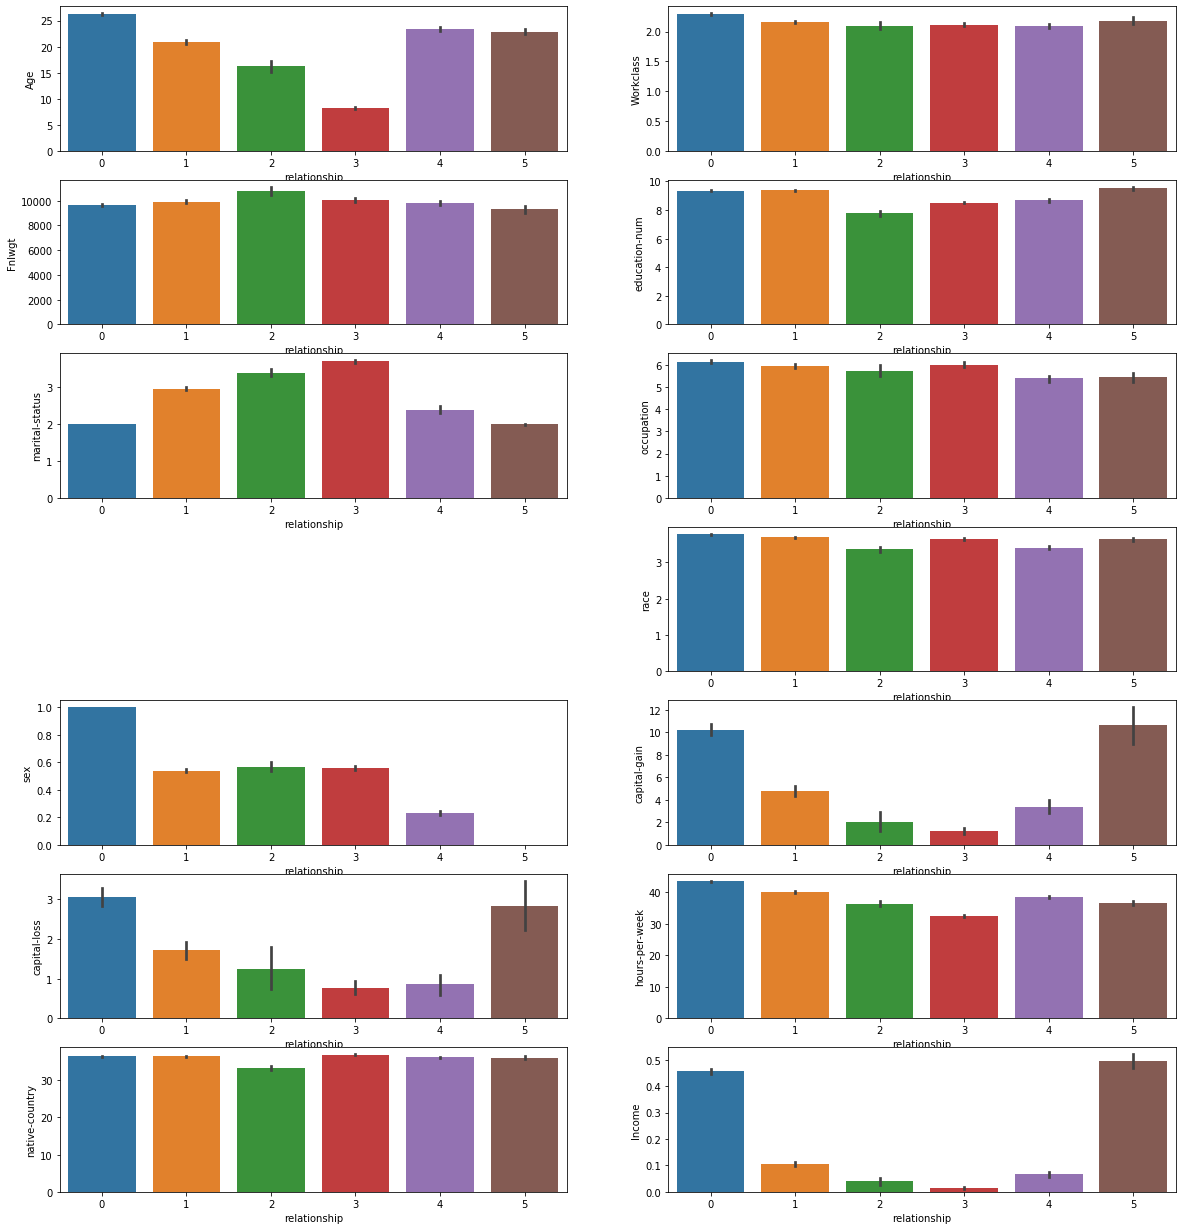

In [24]:
# creating bar plot of colums with respect to relationship to check distribution among relationship
figure(num=None, figsize=(20,25))
for column_index, column in enumerate(cid_train1.columns):
    if column == 'relationship':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='relationship', y=column, data=cid_train1)

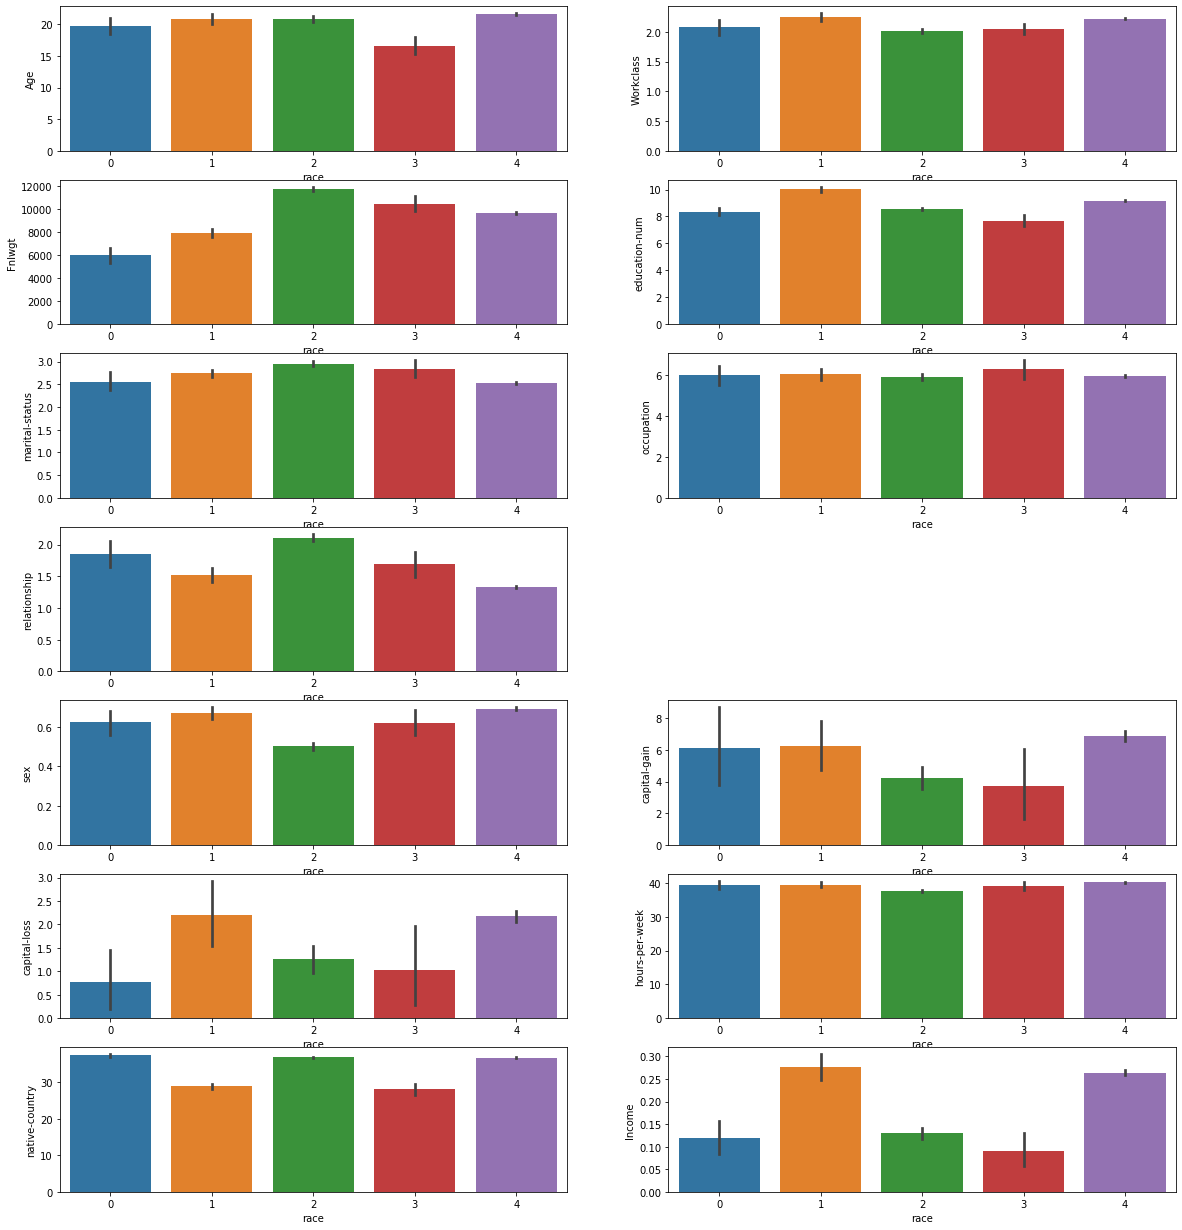

In [25]:
# creating bar plot of colums with respect to race to check distribution among race
figure(num=None, figsize=(20,25))
for column_index, column in enumerate(cid_train1.columns):
    if column == 'race':
        continue
    plt.subplot(8, 2, column_index+1)
    sns.barplot(x='race', y=column, data=cid_train1)

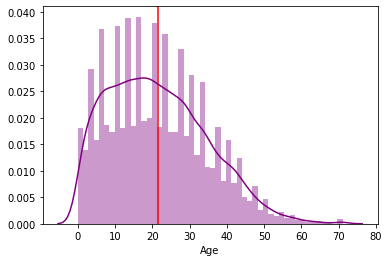

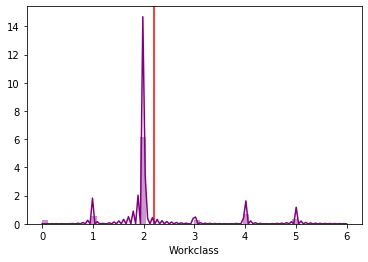

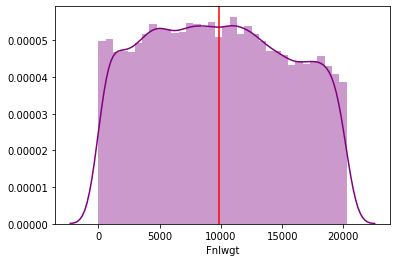

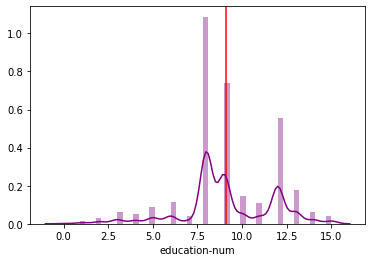

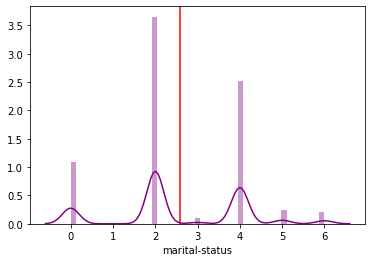

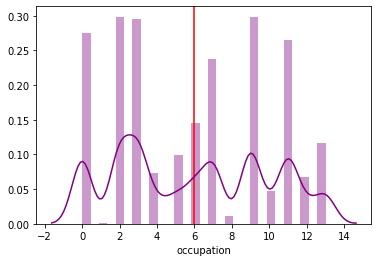

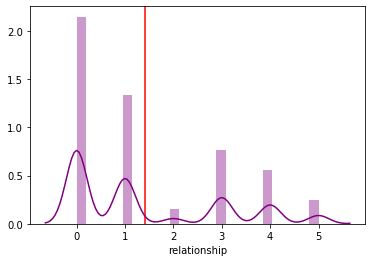

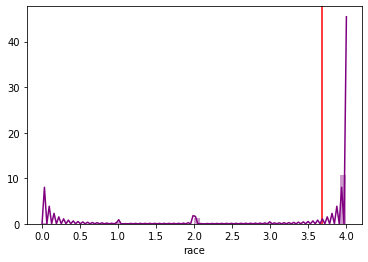

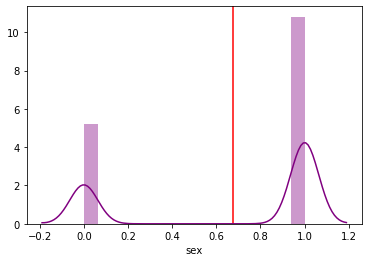

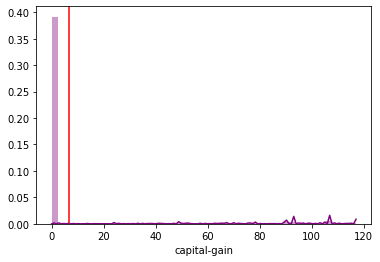

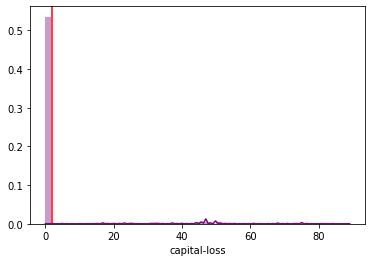

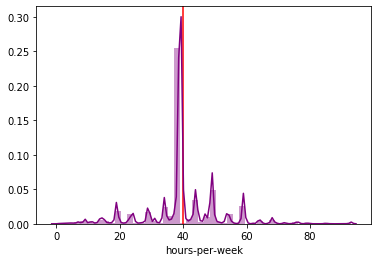

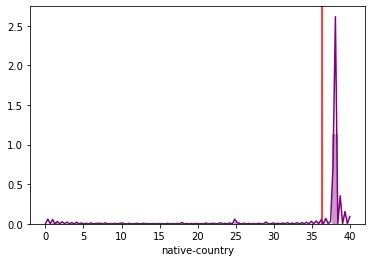

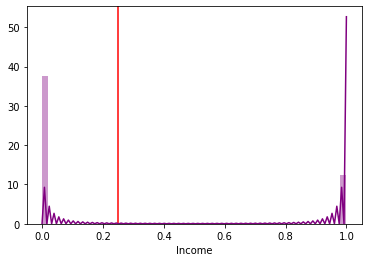

In [26]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(cid_train1):
    plt.figure(i)
    plt.axvline(cid_train1[col].mean(),color = 'r')
    sns.distplot(cid_train1[col],color='purple')

Age                  AxesSubplot(0.125,0.772143;0.227941x0.107857)
Workclass         AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Fnlwgt            AxesSubplot(0.672059,0.772143;0.227941x0.107857)
education-num        AxesSubplot(0.125,0.642714;0.227941x0.107857)
marital-status    AxesSubplot(0.398529,0.642714;0.227941x0.107857)
occupation        AxesSubplot(0.672059,0.642714;0.227941x0.107857)
relationship         AxesSubplot(0.125,0.513286;0.227941x0.107857)
race              AxesSubplot(0.398529,0.513286;0.227941x0.107857)
sex               AxesSubplot(0.672059,0.513286;0.227941x0.107857)
capital-gain         AxesSubplot(0.125,0.383857;0.227941x0.107857)
capital-loss      AxesSubplot(0.398529,0.383857;0.227941x0.107857)
hours-per-week    AxesSubplot(0.672059,0.383857;0.227941x0.107857)
native-country       AxesSubplot(0.125,0.254429;0.227941x0.107857)
Income            AxesSubplot(0.398529,0.254429;0.227941x0.107857)
dtype: object

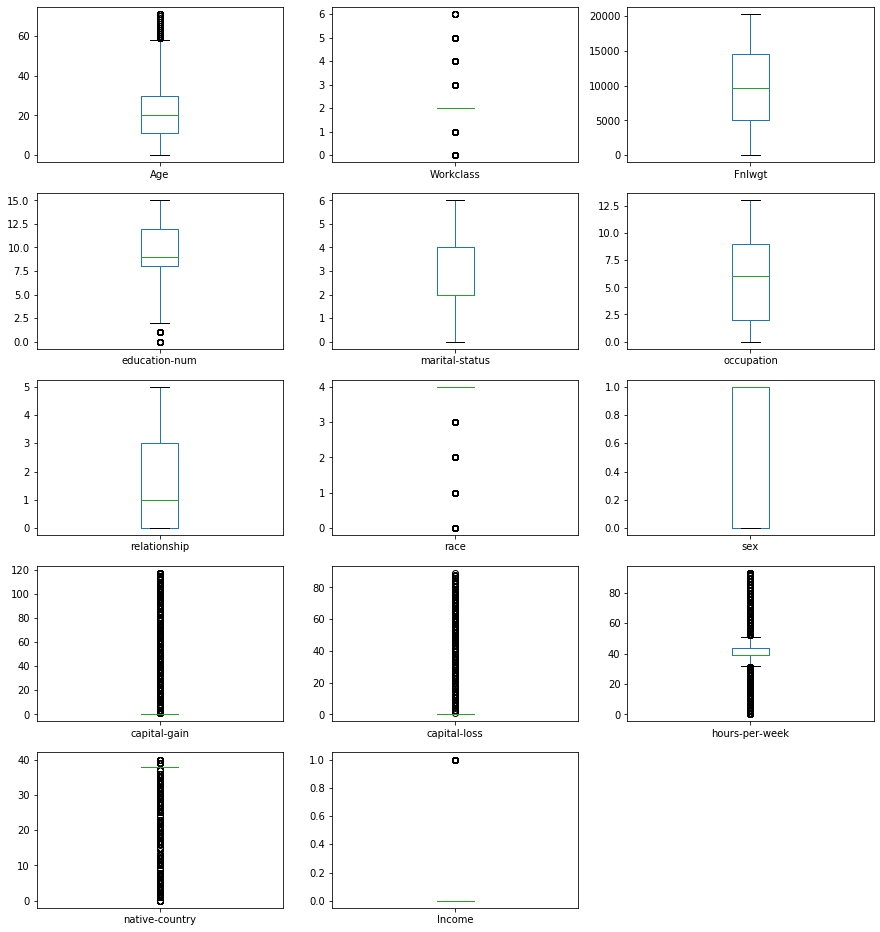

In [27]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
cid_train1.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

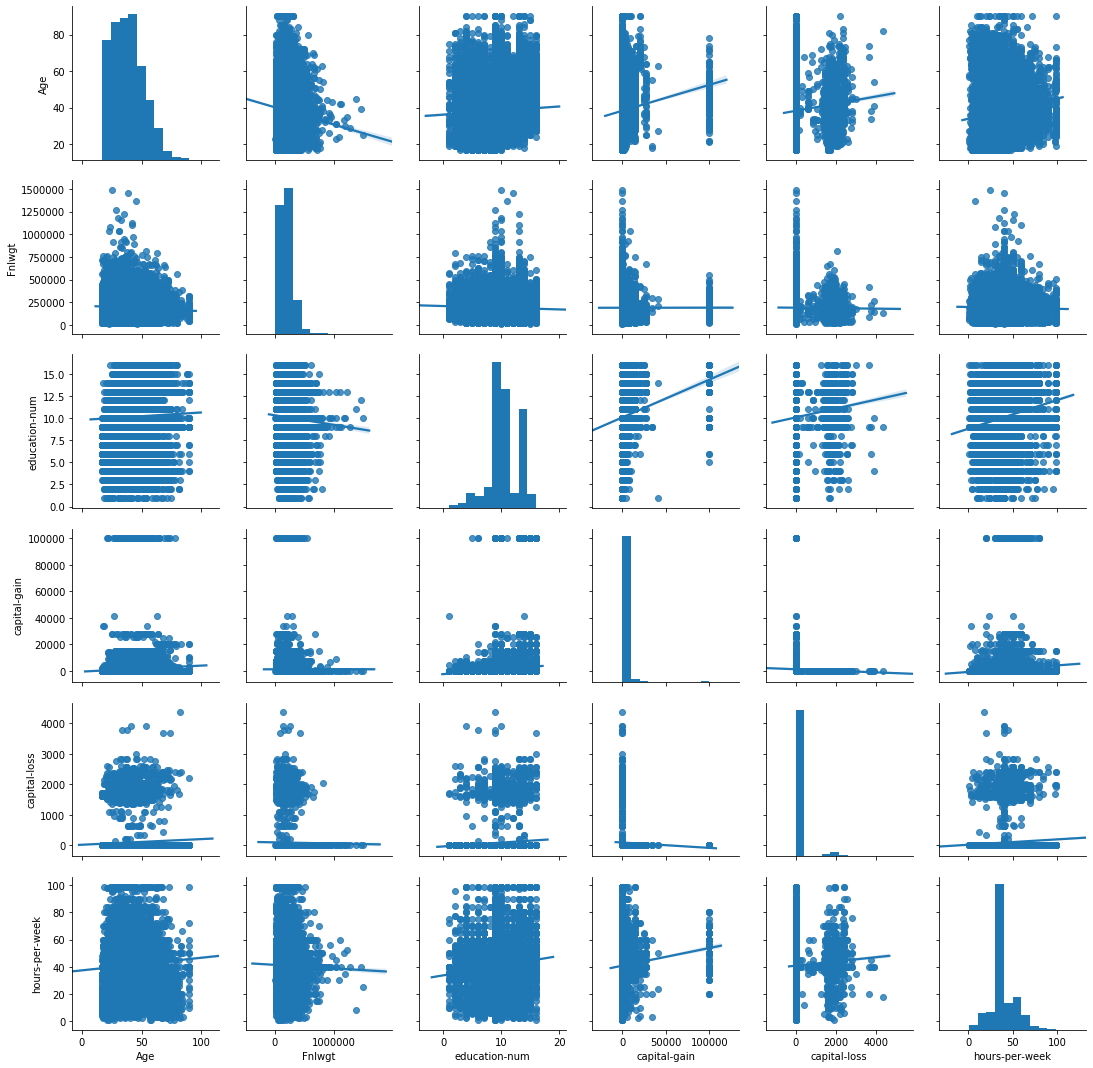

In [28]:
# pair plot to see the scatter of data
sns.pairplot(cid_train, kind='reg')

###### Manipulating data before bulding the model

In [29]:
#Label Encoding Income variable
le=LabelEncoder()
cid_train['Income']=le.fit_transform(cid_train['Income'])
cid_test['Income']=le.fit_transform(cid_test['Income'])
cid_train.sample(5)

,Age,Workclass,Fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26242,79,Self-emp-inc,183686,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,1
18675,30,Self-emp-not-inc,166961,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
9075,36,Private,185360,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,0
16682,78,Self-emp-inc,385242,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,9386,0,45,United-States,1
8808,47,Local-gov,80282,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,3137,0,40,United-States,0


In [30]:
cid_test.sample(5)

,Age,Workclass,Fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
3776,56,Private,269681,9,Divorced,Transport-moving,Unmarried,White,Female,0,0,35,United-States,0
5295,40,Private,222596,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
11183,39,Private,223792,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,72,United-States,0
13161,28,Private,133937,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,15024,0,55,United-States,1
29,32,Self-emp-not-inc,109282,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,0


In [31]:
#Label encoding data native-country
cid_test['native-country']=cid_test['native-country'].apply(lambda x: 0 if x=='United-States' else 1)
#Label encoding data
cid_train['native-country']=cid_train['native-country'].apply(lambda x: 0 if x=='United-States' else 1)
cid_test.sample(5)

,Age,Workclass,Fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
11805,26,Private,211695,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,0,0
7133,36,Self-emp-not-inc,109133,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,0,0
9696,20,Private,95989,10,Never-married,Sales,Own-child,White,Female,0,0,35,0,0
2272,29,Private,226941,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,0,0
5844,43,Private,325461,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,45,0,0


In [32]:
cid_train.sample(5)

,Age,Workclass,Fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
27949,47,Federal-gov,204900,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0
9354,49,Private,180532,14,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,0,0
4893,30,Private,156718,9,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,0,0
31154,23,Private,201138,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,8,0,0
9095,26,State-gov,252284,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,0,0


In [33]:
#checking skewness
Index_train=cid_train[['Age', 'Fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']]
print('\x1b[1;31m'+'Skewness in train data\n\n'+'\x1b[0m',Index_train.skew(),'\n\n')

Index_test=cid_test[['Age', 'Fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']]
print('\x1b[1;31m'+'Skewness in test data\n\n'+'\x1b[0m',Index_test.skew())

Skewness in train data

 Age                0.530228
Fnlwgt             1.459220
capital-gain      11.902682
capital-loss       4.526380
hours-per-week     0.330869
dtype: float64 


Skewness in test data

 Age                0.536112
Fnlwgt             1.424193
capital-gain      11.570156
capital-loss       4.496738
hours-per-week     0.359502
dtype: float64


In [34]:
#removing skewness
Index_train=cid_train[['Age', 'Fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']]
for col in Index_train.columns:
    if Index_train.skew().loc[col]>0.55:
        cid_train[col]=np.power(cid_train[col],1/6)
        
print('\x1b[1;31m'+'Skewness in train data\n\n'+'\x1b[0m',cid_train.skew(),'\n\n')

Index_test=cid_test[['Age', 'Fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']]
for col in Index_test.columns:
    if Index_test.skew().loc[col]>0.55:
        cid_test[col]=np.power(cid_test[col],1/6)
        
print('\x1b[1;31m'+'Skewness in test data\n\n'+'\x1b[0m',cid_test.skew())

Skewness in train data

 Age               0.530228
Fnlwgt           -0.502621
education-num    -0.305379
capital-gain      3.200781
capital-loss      4.275155
hours-per-week    0.330869
native-country    2.906047
Income            1.161408
dtype: float64 


Skewness in test data

 Age               0.536112
Fnlwgt           -0.486230
education-num    -0.320999
capital-gain      3.238399
capital-loss      4.271696
hours-per-week    0.359502
native-country    2.988922
Income            1.181631
dtype: float64


In [35]:
#using get_dummies to convert the vales in numeric form
cid_train=pd.get_dummies(cid_train)
cid_train.head()

,Age,Fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,Income,Workclass_Federal-gov,Workclass_Local-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,6.529780,13,3.599233,0.0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,6.608716,13,0.000000,0.0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,7.743849,9,0.000000,0.0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7.854020,7,0.000000,0.0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,8.347831,13,0.000000,0.0,40,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [36]:
#using get_dummies to convert the vales in numeric form
cid_test=pd.get_dummies(cid_test)
cid_test.head()

,Age,Fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,Income,Workclass_Federal-gov,Workclass_Local-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,25,7.809223,7,0.000000,0.0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,6.692022,9,0.000000,0.0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,8.341826,12,0.000000,0.0,40,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,7.370540,10,4.442583,0.0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,7.638893,6,0.000000,0.0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
# dividing dataset into input values 'x' and output value 'y'
train_x=cid_train.drop(['Income'],axis=1)
print('train_x data\n',train_x.head(),'\n')
train_y=cid_train['Income']
print('train_y data\n',train_y.head())

train_x data
    Age    Fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39  6.529780             13      3.599233           0.0              40   
1   50  6.608716             13      0.000000           0.0              13   
2   38  7.743849              9      0.000000           0.0              40   
3   53  7.854020              7      0.000000           0.0              40   
4   28  8.347831             13      0.000000           0.0              40   

   native-country  Workclass_Federal-gov  Workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               1                      0                    0   

   Workclass_Private  ...  relationship_Own-child  relationship_Unmarried  \
0                  0  ...                  

In [38]:
# dividing dataset into input values 'x' and output value 'y'
test_x=cid_test.drop(['Income'],axis=1)
print('test_x data\n',test_x.head(),'\n')
test_y=cid_test['Income']
print('test_y data\n',test_y.head())

test_x data
    Age    Fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   25  7.809223              7      0.000000           0.0              40   
1   38  6.692022              9      0.000000           0.0              50   
2   28  8.341826             12      0.000000           0.0              40   
3   44  7.370540             10      4.442583           0.0              40   
5   34  7.638893              6      0.000000           0.0              30   

   native-country  Workclass_Federal-gov  Workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    1   
3               0                      0                    0   
5               0                      0                    0   

   Workclass_Private  ...  relationship_Own-child  relationship_Unmarried  \
0                  1  ...                   

In [39]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
train_x=scale.fit_transform(train_x)
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
test_x=scale.fit_transform(test_x)

###### Bulding and comparing multipe classification model, to find out the best model

In [40]:
#creating models array with all the model, along with few blank array for further use
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [41]:
Model_array=[]

test_accuracy_array=[]
train_accuracy_array=[]

train_Cross_val_score_array=[]
test_Cross_val_score_array=[]
# loop to find out the cross_val_score of all the model in models array along the range of random state
for name, model in Models:
        
    model.fit(train_x,train_y)
    
    train_pred=model.predict(train_x)
    train_acc=accuracy_score(train_y,train_pred)
    
    test_pred=model.predict(test_x)
    test_acc=accuracy_score(test_y,test_pred)
    
    train_score=cross_val_score(model,train_x,train_y,cv=10,scoring='accuracy')
    test_score=cross_val_score(model,test_x,test_y,cv=10,scoring='accuracy')
        
    Model_array.append(name)
    
    train_accuracy_array.append(train_acc)
    test_accuracy_array.append(test_acc)

    train_Cross_val_score_array.append(train_score.mean())
    test_Cross_val_score_array.append(test_score.mean())

In [42]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,
                                            'Train Cross val Acuracy': train_Cross_val_score_array,
                                            'Test Cross val Acuracy': test_Cross_val_score_array,

                                            'Train Accuracy':train_accuracy_array,
                                            'Test Accuracy':test_accuracy_array})
model_cross_val_performance.sort_values(by='Train Cross val Acuracy', ascending=False)

,Model,Train Cross val Acuracy,Test Cross val Acuracy,Train Accuracy,Test Accuracy
5,GradientBoostingClassifier,0.862443,0.863745,0.864266,0.860956
7,RandomForestClassifier,0.847292,0.841235,0.987435,0.838247
0,SVC,0.843744,0.840704,0.854419,0.845219
3,LogisticRegression,0.841490,0.842961,0.841688,0.843094
6,LinearDiscriminantAnalysis,0.839567,0.842829,0.840130,0.841567
2,SGDClassifier,0.833069,0.830478,0.830582,0.827888
8,KNeighborsClassifier,0.824050,0.822311,0.876235,0.822377
4,DecisionTreeClassifier,0.809496,0.806175,0.999967,0.798141
1,GaussianNB,0.629929,0.759695,0.643691,0.638845
9,QuadraticDiscriminantAnalysis,0.614415,0.726361,0.541144,0.355246


###### Conclusion
On basis of above comparison GradientBoostingClassifier model is performing best on given train and test data..

In [43]:
#using grid search to improve model..
param_grid={'max_depth':[4,5,6],'max_features':['auto','sqrt'],'min_samples_split':[4,5,6],
            'n_estimators':[200,300,400],'min_samples_leaf':[6,7,8]}
mod=GradientBoostingClassifier()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=2)
grid_result=grid.fit(train_x,train_y)

In [44]:
grid_result.best_score_

0.8719249386645448

In [45]:
grid_result.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 300}

In [46]:
grid_result.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Model score is: 0.8577689243027888 

Accuracy score of model is :  0.8577689243027888 

The mean of cross_val_score for the model is: 0.8656042496679947 

Precision score of model is : 0.7471446700507615 

Recall score of model is : 0.6364864864864865 

Log loss score of model is : 4.912529635926331 

F1_score score of model is : 0.6873905429071805 

Confusion matrix for the model is : 
 [[10563   797]
 [ 1345  2355]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     11360
           1       0.75      0.64      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.78      0.80     15060
weighted avg       0.85      0.86      0.85     15060
 



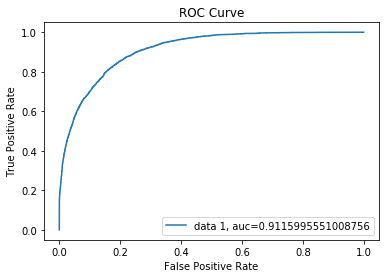

In [47]:
#final classification model
gbc=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbc.fit(train_x,train_y)
pred=gbc.predict(test_x)
predict_proba = gbc.predict_proba(test_x)[::,1]
score=cross_val_score(gbc,test_x,test_y,cv=10,scoring='accuracy').mean()

print('Model score is:',gbc.score(test_x,test_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')

print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')

print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 11 Census Income Data Set.csv')

In [49]:
# saving the model using pickle.
joblib.dump(gbc,'gbc_Project 11 Census Income Data Set.pkl')

['gbc_Project 11 Census Income Data Set.pkl']